In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
data = pd.read_csv('./data/units-sold-by-month.csv')

# Preprocess dates
data['month'] = data['month'].str.upper()
data['month'] = data['month'].str[0:3]
data['month'] = pd.Categorical(data['month'], categories=[
    'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], ordered=True)

data['month number'] = data['month'].map({
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
})

/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if

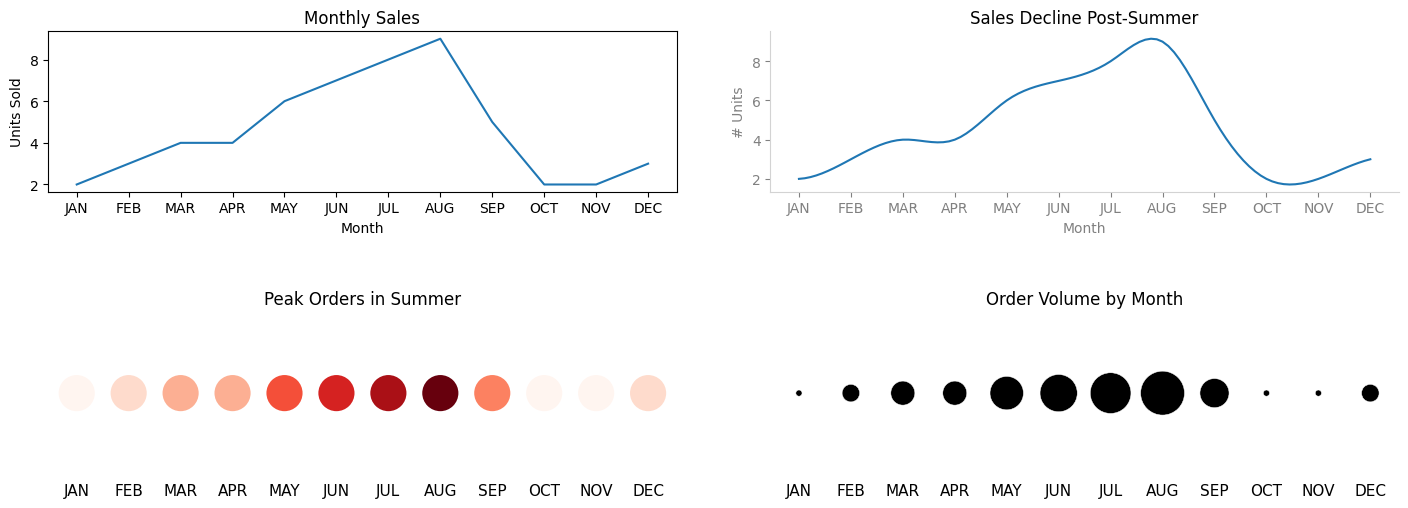

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(15, 6))

# Shared variables
spines = ['top', 'right', 'left', 'bottom']

# First figure
sns.lineplot(ax=axes[0, 0], data=data, x='month', y='units sold')
axes[0, 0].set_title('Monthly Sales')
axes[0, 0].set(xlabel='Month', ylabel='Units Sold')

# Second figure
x_new = np.linspace(1, 12, 100)
bspline = interpolate.make_interp_spline(data['month number'], data['units sold'])
y_new = bspline(x_new)

sns.lineplot(ax=axes[0, 1], x=x_new, y=y_new)
axes[0, 1].set_title('Sales Decline Post-Summer')
axes[0, 1].set(xlabel='Month', ylabel='# Units')
axes[0, 1].spines['top'].set_visible(False)
axes[0, 1].spines['right'].set_visible(False)
for spine in spines:
    axes[0, 1].spines[spine].set_color('lightgray')
axes[0, 1].set_xticks(data['month number'])
axes[0, 1].set_xticklabels(data['month'])

# Third figure
sns.scatterplot(ax=axes[1,0], data=data, x='month', y=[1]*len(data), hue='units sold', palette='Reds', legend=False, s=800)
axes[1, 0].set_title('Peak Orders in Summer')
axes[1, 0].set_yticks([])
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].tick_params(axis='x', which='both', bottom=False, top=False)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=0, ha='center', fontsize=11)
axes[0, 1].xaxis.label.set_color('gray')
axes[0, 1].yaxis.label.set_color('gray')
axes[0, 1].tick_params(axis='x', colors='gray')
axes[0, 1].tick_params(axis='y', colors='gray')
for spine in spines:
    axes[1, 0].spines[spine].set_visible(False)

# Fourth figure
sns.scatterplot(ax=axes[1,1], data=data, x='month', y=[1]*len(data), size='units sold', legend=False, sizes=(20, 1000), color='black')
axes[1, 1].set_title('Order Volume by Month')
axes[1, 1].set_yticks([])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='x', which='both', bottom=False, top=False)
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=0, ha='center', fontsize=11)
for spine in spines:
    axes[1, 1].spines[spine].set_visible(False)

plt.tight_layout(pad=4)

plt.savefig(fname='./visualizations/Units Sold By Month.png')